In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
# sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("../data/processed_sensor_community.csv", index_col=0)
df.timestamp = pd.to_datetime(df.timestamp)
df

,hour,date,lat,lon,timestamp,PM10,PM2p5,PM10_std,PM2p5_std,pressure,temperature,humidity,pressure_std,temperature_std,humidity_std,city
0,0,2020-01-01,50.042000,8.436000,2020-01-01 00:00:00,212.110833,140.574167,24.278724,16.827501,NaN,2.700000,96.000000,NaN,NaN,NaN,Frankfurt
1,0,2020-01-01,50.046000,8.852000,2020-01-01 00:00:00,627.256000,311.089200,62.521844,41.972714,NaN,-0.536000,98.892000,NaN,0.111355,0.351094,Frankfurt
2,0,2020-01-01,50.055659,8.692377,2020-01-01 00:00:00,305.763333,203.632500,114.922437,81.541566,NaN,-0.108333,99.900000,NaN,0.210417,0.000000,Frankfurt
3,0,2020-01-01,50.056000,8.506000,2020-01-01 00:00:00,177.833333,86.575000,32.063441,18.312198,NaN,NaN,NaN,NaN,NaN,NaN,Frankfurt
4,0,2020-01-01,50.058000,8.688000,2020-01-01 00:00:00,96.024167,51.565833,60.892413,31.903331,102132.965833,6.958333,53.087500,10.008531,0.067545,0.416280,Frankfurt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872414,23,2022-02-28 00:00:00,53.094000,8.800000,2022-02-28 23:00:00,30.930000,17.439167,2.525716,1.082826,103067.097083,2.551250,100.000000,5.860273,0.084971,0.000000,Bremen
1872415,23,2022-02-28 00:00:00,53.096000,8.802000,2022-02-28 23:00:00,49.369455,21.796909,2.883743,0.877165,NaN,2.487273,99.900000,NaN,0.086184,0.000000,Bremen
1872416,23,2022-02-28 00:00:00,53.131823,8.732302,2022-02-28 23:00:00,29.000000,14.251818,2.167469,0.638940,103027.205909,1.310000,100.000000,6.738443,0.102446,0.000000,Bremen
1872417,23,2022-02-28 00:00:00,53.132000,8.708000,2022-02-28 23:00:00,5.765263,5.185789,0.447950,0.387317,NaN,22.594737,31.521053,NaN,0.077986,0.063060,Bremen


In [3]:
non_data_cols = [ 'timestamp', 'hour', 'date', 'lat', 'lon','city']
data_cols = sorted([col for col in list(df.columns) if col not in non_data_cols])
data_cols_wo_std = [col for col in data_cols if 'std' not in col]
std_cols = [col for col in data_cols if 'std' in col]

# reorganize columns: first non-data columns, then sorted data columns
df = df .reindex(columns=non_data_cols+data_cols)
df

,timestamp,hour,date,lat,lon,city,PM10,PM10_std,PM2p5,PM2p5_std,humidity,humidity_std,pressure,pressure_std,temperature,temperature_std
0,2020-01-01 00:00:00,0,2020-01-01,50.042000,8.436000,Frankfurt,212.110833,24.278724,140.574167,16.827501,96.000000,NaN,NaN,NaN,2.700000,NaN
1,2020-01-01 00:00:00,0,2020-01-01,50.046000,8.852000,Frankfurt,627.256000,62.521844,311.089200,41.972714,98.892000,0.351094,NaN,NaN,-0.536000,0.111355
2,2020-01-01 00:00:00,0,2020-01-01,50.055659,8.692377,Frankfurt,305.763333,114.922437,203.632500,81.541566,99.900000,0.000000,NaN,NaN,-0.108333,0.210417
3,2020-01-01 00:00:00,0,2020-01-01,50.056000,8.506000,Frankfurt,177.833333,32.063441,86.575000,18.312198,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01 00:00:00,0,2020-01-01,50.058000,8.688000,Frankfurt,96.024167,60.892413,51.565833,31.903331,53.087500,0.416280,102132.965833,10.008531,6.958333,0.067545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872414,2022-02-28 23:00:00,23,2022-02-28 00:00:00,53.094000,8.800000,Bremen,30.930000,2.525716,17.439167,1.082826,100.000000,0.000000,103067.097083,5.860273,2.551250,0.084971
1872415,2022-02-28 23:00:00,23,2022-02-28 00:00:00,53.096000,8.802000,Bremen,49.369455,2.883743,21.796909,0.877165,99.900000,0.000000,NaN,NaN,2.487273,0.086184
1872416,2022-02-28 23:00:00,23,2022-02-28 00:00:00,53.131823,8.732302,Bremen,29.000000,2.167469,14.251818,0.638940,100.000000,0.000000,103027.205909,6.738443,1.310000,0.102446
1872417,2022-02-28 23:00:00,23,2022-02-28 00:00:00,53.132000,8.708000,Bremen,5.765263,0.447950,5.185789,0.387317,31.521053,0.063060,NaN,NaN,22.594737,0.077986


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872419 entries, 0 to 1872418
Data columns (total 16 columns):
 #   Column           Dtype         
---  ------           -----         
 0   timestamp        datetime64[ns]
 1   hour             int64         
 2   date             object        
 3   lat              float64       
 4   lon              float64       
 5   city             object        
 6   PM10             float64       
 7   PM10_std         float64       
 8   PM2p5            float64       
 9   PM2p5_std        float64       
 10  humidity         float64       
 11  humidity_std     float64       
 12  pressure         float64       
 13  pressure_std     float64       
 14  temperature      float64       
 15  temperature_std  float64       
dtypes: datetime64[ns](1), float64(12), int64(1), object(2)
memory usage: 242.9+ MB


In [5]:
df[data_cols_wo_std].describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
PM10,1872408.0,28.1,162.7,0.0,4.2,8.1,16.1,1999.9
PM2p5,1872405.0,15.0,84.5,0.0,1.9,4.1,9.2,999.9
humidity,1559298.0,79.8,26.9,0.0,63.2,95.5,99.9,2094.5
pressure,366039.0,99734.6,17079.0,951.0,99874.2,100638.4,101455.6,6437390.9
temperature,1571687.0,12.2,53.9,-3276.6,6.8,12.2,19.1,196.0


In [6]:
df[df['city']=='Frankfurt'][data_cols_wo_std].describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
PM10,1230735.0,19.1,106.0,0.0,3.7,7.1,13.9,1999.9
PM2p5,1230733.0,11.0,60.1,0.0,1.7,3.7,8.2,999.9
humidity,1004738.0,76.4,28.8,0.0,58.1,89.5,99.9,2094.5
pressure,269766.0,99908.8,18574.1,951.0,99727.7,100416.0,101081.8,6437390.9
temperature,1015272.0,11.8,66.7,-3276.6,6.7,12.2,19.4,196.0


In [7]:
df[df['city']=='Bremen'][data_cols_wo_std].describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
PM10,641673.0,45.3,235.1,0.0,5.6,10.6,20.8,1999.9
PM2p5,641672.0,22.7,117.6,0.0,2.4,4.9,11.5,999.9
humidity,554560.0,85.9,21.7,0.0,75.7,99.9,99.9,100.0
pressure,96273.0,99246.3,11916.5,979.0,100659.7,101507.1,102176.4,111863.9
temperature,556415.0,13.0,9.6,-145.2,7.0,12.2,18.6,64.9


PM10: Mean is almost double of the 75th percentile -> Outliers raise the mean extremely </br>
PM2.5: similar to PM10, but less extreme </br>
humidity: al values (mean, 25th, 50th and 75th percentile) seem to be very large, the max value is above 100, what doesn't make any sense </br>
pressure: assuming the units are Pa (1 bar = 100.000 Pa): min value is below 100 -> unrealistic, max value is also unrealistic (more than 60 bar) </br>
temperature: std seems very high (54 °C), min and max value are unrealistic </br>
 </br>
 Bremen vs. Frankfurt </br>
 PM10 and PM2.5: std for Bremen is double of std for Frankfurt </br>
 humidity: 50th percentile of Bremen is already 99.9 % what seems quite high
 pressure and temperature: no obvious unrealistic observations besides the min and max values

In [8]:
print("missing values in each column")
for col in df.columns:
    print(f"{col}: {df[col].isna().sum()} ({round(df[col].isna().sum() / df.shape[0] * 100, 1)} %)")

missing values in each column
timestamp: 0 (0.0 %)
hour: 0 (0.0 %)
date: 0 (0.0 %)
lat: 0 (0.0 %)
lon: 0 (0.0 %)
city: 0 (0.0 %)
PM10: 11 (0.0 %)
PM10_std: 5940 (0.3 %)
PM2p5: 14 (0.0 %)
PM2p5_std: 5944 (0.3 %)
humidity: 313121 (16.7 %)
humidity_std: 317713 (17.0 %)
pressure: 1506380 (80.5 %)
pressure_std: 1507361 (80.5 %)
temperature: 300732 (16.1 %)
temperature_std: 305330 (16.3 %)


In [9]:
print("value '0' in each column")
for col in df.columns:
    print(f"{col}: {df[df[col]==0][col].count()} ({round(df[df[col]==0][col].count() / df.shape[0] * 100, 1)} %)")

value '0' in each column
timestamp: 0 (0.0 %)
hour: 76495 (4.1 %)
date: 0 (0.0 %)
lat: 0 (0.0 %)
lon: 0 (0.0 %)
city: 0 (0.0 %)
PM10: 2662 (0.1 %)
PM10_std: 15968 (0.9 %)
PM2p5: 3300 (0.2 %)
PM2p5_std: 22337 (1.2 %)
humidity: 303 (0.0 %)
humidity_std: 746411 (39.9 %)
pressure: 0 (0.0 %)
pressure_std: 973 (0.1 %)
temperature: 201 (0.0 %)
temperature_std: 16345 (0.9 %)


In [10]:
def count_nan_and_0s(df: pd.DataFrame, cols: list = None) -> pd.DataFrame:
    """Counts zeros and nans per column.

    Args:
        df (pd.DataFrame): Dataframe to search for zeros and nans.
        cols (list, optional): List of columns, if no columns are specified all will be used. Defaults to None.
        thresholds (dict, optional): Thresholds for further . Defaults to None.

    Returns:
        pd.DataFrame: Dataframe containing counts of zeros and nans.
    """
    # use all columns af none were defined
    if cols == None:
        cols=df.columns
    # make a new dataframe and put the defined column names in the first column
    df_nan_0 = pd.DataFrame()
    df_nan_0['data'] = cols
    # calculate missing values and zeros as absolute value and share 
    df_nan_0['missing_values'] = [df[col].isna().sum() for col in cols]
    df_nan_0['missing_values_share'] = [df[col].isna().sum() / df.shape[0] * 100 for col in cols]
    df_nan_0['0_values'] = [df[df[col]==0][col].count() for col in cols]
    df_nan_0['0_values_share'] = [df[df[col]==0][col].count() / df.shape[0] * 100 for col in cols]

    # transpose the dataframe and use the original column names as column names
    df_nan_0 = df_nan_0.set_index('data').T.reset_index()
    df_nan_0.columns = [name if i>0 else 'metric' for i, name in enumerate(df_nan_0.columns)]
    return df_nan_0

df_data_analysis = count_nan_and_0s(df, data_cols)
df_data_analysis


,metric,PM10,PM10_std,PM2p5,PM2p5_std,humidity,humidity_std,pressure,pressure_std,temperature,temperature_std
0,missing_values,11.000000,5940.000000,14.000000,5944.000000,313121.000000,317713.00000,1.506380e+06,1.507361e+06,300732.000000,305330.000000
1,missing_values_share,0.000587,0.317237,0.000748,0.317450,16.722806,16.96805,8.045101e+01,8.050340e+01,16.061149,16.306713
2,0_values,2662.000000,15968.000000,3300.000000,22337.000000,303.000000,746411.00000,0.000000e+00,9.730000e+02,201.000000,16345.000000
3,0_values_share,0.142169,0.852801,0.176243,1.192949,0.016182,39.86346,0.000000e+00,5.196486e-02,0.010735,0.872935


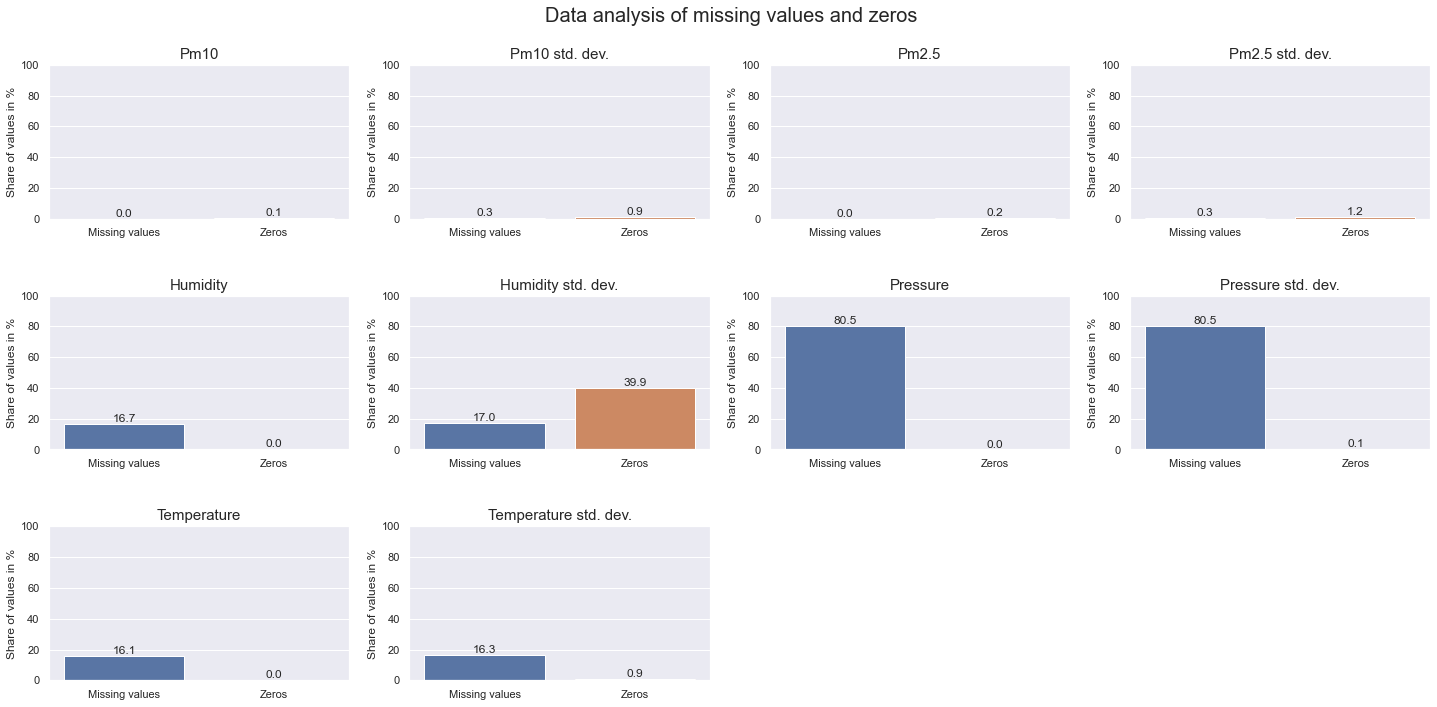

In [11]:
# define metrics and columns to plot
metrics = ["missing_values_share", "0_values_share"]
ys = sorted(list(df_data_analysis.columns))
ys.remove('metric')

# define size of subplot
columns = 4
rows = int(np.ceil((len(df_data_analysis.columns) - 1) / columns))

# plot
fig, ax = plt.subplots(rows, columns, figsize=(20,10)) # create subplots
plt.suptitle("Data analysis of missing values and zeros", fontsize=20) # title of plot
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

for row in range(rows):
    for col in range(columns):
        if col + row * (rows + 1) < len(ys):
            # create a bar for each metric defined above for a column of ys list
            sns.barplot(data=df_data_analysis[df_data_analysis['metric'].isin(metrics)], x='metric', y=ys[col + row * (rows + 1)], ax=ax[row][col])
            # set ylim to [0, 100] as we are plotting percentages
            ax[row][col].set_ylim([0, 100])
            # put the percentage above each plotted bar
            ax[row][col].bar_label(ax[row][col].containers[0], fmt='%.1f')
            # set the x, y and x-tick labels
            ax[row][col].set_xlabel("")
            ax[row][col].set_ylabel("Share of values in %")
            ax[row][col].set_xticklabels(labels=["Missing values", "Zeros"])
            # use the column name with slight changes as subplot name
            title = f"{ys[col + row * (rows + 1)]}".replace('_', ' ').replace('std', 'std. dev.').replace('2p5', '2.5').capitalize()
            ax[row][col].set_title(title, fontsize = 15);
        else:
            # delete not needed subplots
            fig.delaxes(ax[row][col])


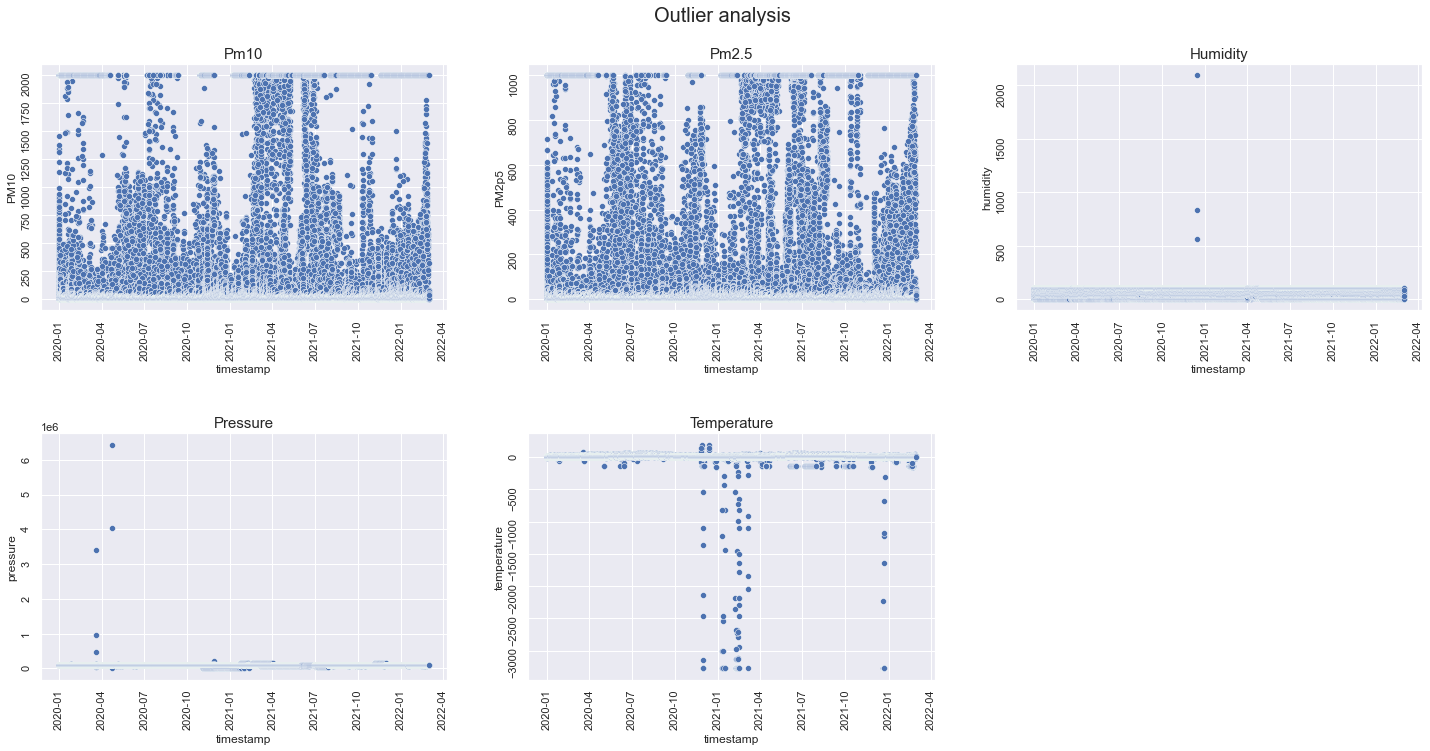

In [42]:
# define metrics and columns to plot
metrics = ["missing_values_share", "0_values_share"]
ys = data_cols_wo_std

# define size of subplot
columns = 3
rows = int(np.ceil((len(ys)) / columns))

# plot
fig, ax = plt.subplots(rows, columns, figsize=(20,10)) # create subplots
plt.suptitle("Outlier analysis", fontsize=20) # title of plot
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

for row in range(rows):
    for col in range(columns):
        if col + row * (rows + 1) < len(ys):
            # create a bar for each metric defined above for a column of ys list
            sns.scatterplot(data=df, x='timestamp', y=ys[col + row * (rows + 1)], ax=ax[row][col])
            # set the x, y and x-tick labels
            # ax[row][col].set_xlabel("")
            # use the column name with slight changes as subplot name
            title = f"{ys[col + row * (rows + 1)]}".replace('_', ' ').replace('std', 'std. dev.').replace('2p5', '2.5').capitalize()
            ax[row][col].set_title(title, fontsize = 15)
            ax[row][col].tick_params(labelrotation=90)
        else:
            # delete not needed subplots
            fig.delaxes(ax[row][col])


There are few outliers in humidity, pressure and temperature which can be dropped by setting thresholds. </br>
For PM10 and PM2.5 it is less obvious as the data is scattered al over the possible range. 

In [92]:
sensor_count = df[['lat', 'lon', 'hour', 'date']].\
    groupby(['lat', 'lon']).\
        agg(
                hours = pd.NamedAgg(column='hour', aggfunc='count'), 
                date_min = pd.NamedAgg(column='date', aggfunc='min'),
                date_max = pd.NamedAgg(column='date', aggfunc='max')
            ).\
            reset_index().\
                sort_values('hours', ascending=False)

sensor_count['date_min'] = pd.to_datetime(sensor_count['date_min'])
sensor_count['date_max'] = pd.to_datetime(sensor_count['date_max'])
sensor_count['period_length'] = sensor_count['date_max'] - sensor_count['date_min'] + pd.Timedelta(days=1)
sensor_count['hours_per_day'] = sensor_count['hours'] / sensor_count['period_length'].dt.days
sensor_count['position'] = round(sensor_count['lat'], 3).astype(str) + ', ' + round(sensor_count['lon'], 3).astype(str)
sensor_count.sample(5)

,lat,lon,hours,date_min,date_max,period_length,hours_per_day,position
21,50.086000,8.576000,16732,2020-01-01,2022-02-28,790 days,21.179747,"50.086, 8.576"
85,50.134582,8.527964,2,2021-03-03,2021-03-03,1 days,2.000000,"50.135, 8.528"
150,53.076561,8.803984,5524,2020-01-01,2021-02-28,425 days,12.997647,"53.077, 8.804"
109,50.168000,8.492000,4409,2021-07-10,2022-02-28,234 days,18.841880,"50.168, 8.492"
143,53.070000,8.784000,7494,2020-01-01,2021-01-08,374 days,20.037433,"53.07, 8.784"


''

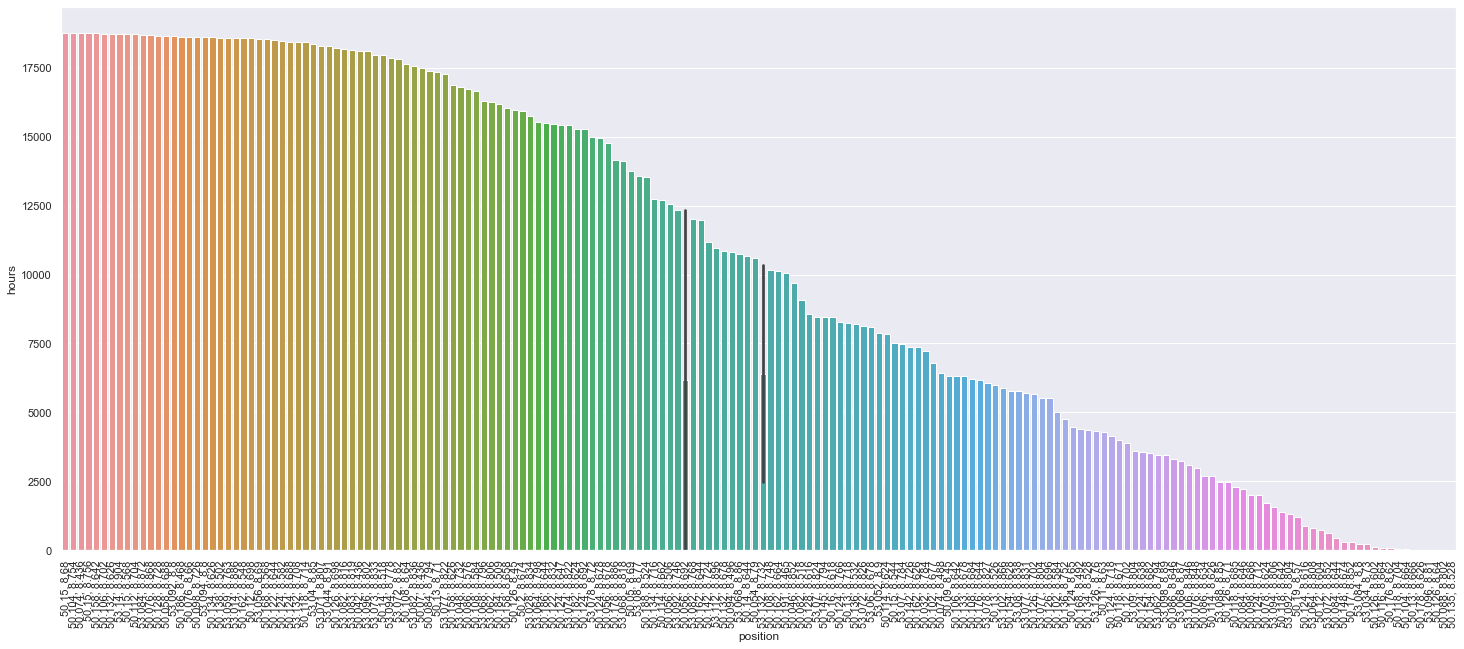

In [93]:
# plot the number of hours that were measured at each position
plt.figure(figsize=(25, 10))
g = sns.barplot(data=sensor_count, x='position', y='hours')
plt.xticks(rotation=90)
;

''

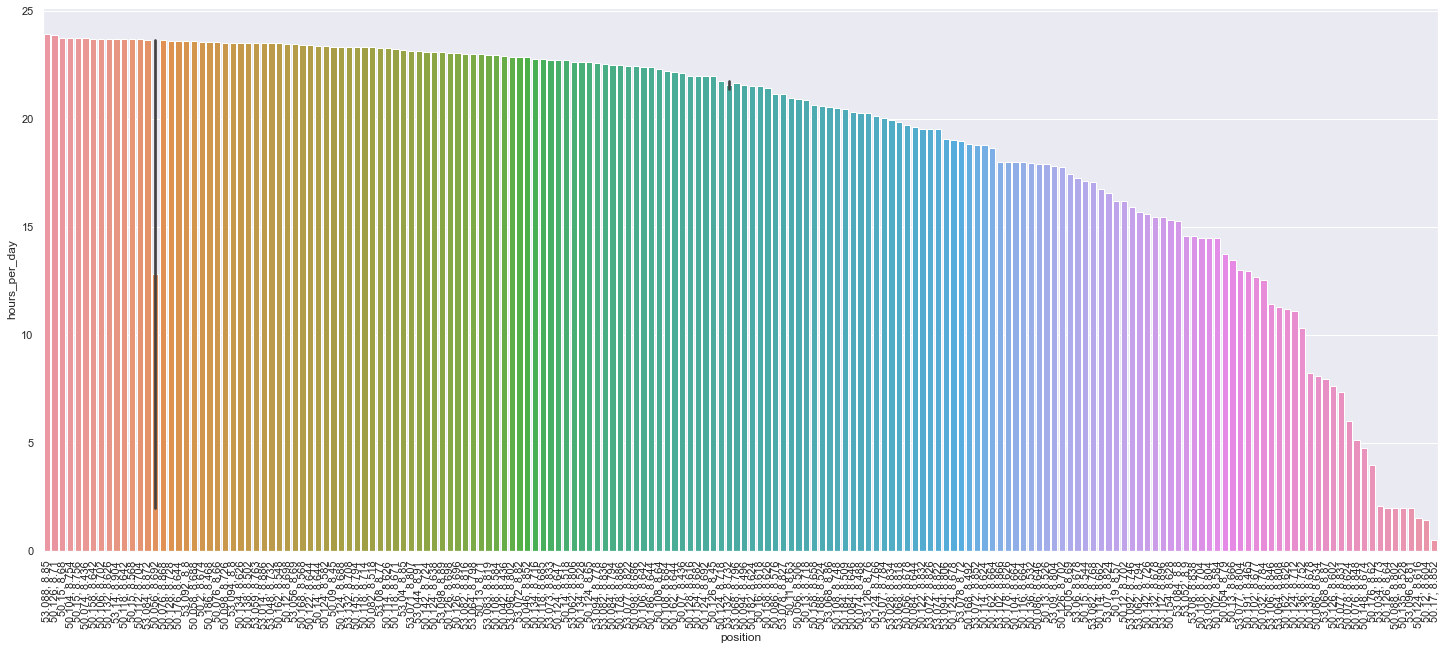

In [96]:
# plot the number of hours that were measured at each position
plt.figure(figsize=(25, 10))
g = sns.barplot(data=sensor_count.sort_values('hours_per_day', ascending=False), x='position', y='hours_per_day')
plt.xticks(rotation=90)
;

In [ ]:
# plot the number of hours that were measured at each position
plt.figure(figsize=(25, 10))

sensor_count['position'] = round(sensor_count['lat'], 3).astype(str) + ', ' + round(sensor_count['lon'], 3).astype(str)
g = sns.barplot(data=sensor_count, x='position', y='hours')
plt.xticks(rotation=90)
;

In [ ]:
sensor_count.tail(20)

,lat,lon,count,date_min,date_max,period_length,position
137,53.064000,8.808000,803,2020-12-01,2021-02-09,70 days,"53.064, 8.808"
50,50.120000,8.604000,740,2020-04-04,2021-08-28,511 days,"50.12, 8.604"
147,53.072000,8.852000,620,2020-01-01,2020-02-02,32 days,"53.072, 8.852"
18,50.084000,8.644000,432,2021-12-17,2022-01-07,21 days,"50.084, 8.644"
94,50.148000,8.674000,314,2020-01-31,2020-04-05,65 days,"50.148, 8.674"
111,50.170000,8.852000,310,2020-06-13,2022-01-16,582 days,"50.17, 8.852"
161,53.084000,8.800000,229,2020-07-15,2020-07-29,14 days,"53.084, 8.8"
126,53.034000,8.730000,225,2020-01-01,2020-04-16,106 days,"53.034, 8.73"
67,50.126000,8.602000,130,2021-04-08,2021-04-24,16 days,"50.126, 8.602"
44,50.116000,8.664000,72,2021-09-29,2021-10-02,3 days,"50.116, 8.664"


In [ ]:
sensor_count['hours'].describe().T

count      182.000000
mean     10288.016484
std       6753.917426
min          2.000000
25%       4033.250000
50%      10249.000000
75%      17547.000000
max      18775.000000
Name: count, dtype: float64

There are some sensor locations which delivered data only for few hours